<a href="https://colab.research.google.com/github/as9786/ML-DLPratice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
def calc_bmi(h,w):
    bmi = w/(h/100)**2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'

In [4]:
fp = open('bmi.csv','w',encoding='utf-8')
fp.write('height,weight,label\r\n')

21

In [6]:
cnt = {'thin':0,'normal':0,'fat':0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write('{0},{1},{2}\r\n'.format(h,w,label))
fp.close()
print('ok',cnt)

ok {'thin': 6343, 'normal': 5996, 'fat': 7661}


In [8]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
tbl = pd.read_csv('bmi.csv')

In [10]:
tbl.head()

,height,weight,label
0,165,79,fat
1,157,77,fat
2,120,80,fat
3,129,76,fat
4,155,46,normal


In [11]:
label = tbl['label']
w = tbl['weight']/100
h = tbl['height']/200
wh = pd.concat([w,h],axis=1)

In [12]:
data_train,data_test,label_train,label_test = train_test_split(wh,label)

In [13]:
clf = svm.SVC()
clf.fit(data_train,label_train)

SVC()

In [15]:
predict = clf.predict(data_test)

In [17]:
ac_score = metrics.accuracy_score(label_test,predict)
cl_report = metrics.classification_report(label_test,predict)
print('정답률=',ac_score)
print('리포트=\n',cl_report)

정답률= 0.9942
리포트=
               precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1871
      normal       0.98      1.00      0.99      1502
        thin       1.00      0.99      1.00      1627

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



# 데이터 분포 확인하기

In [18]:
tbl = pd.read_csv('bmi.csv',index_col=2)

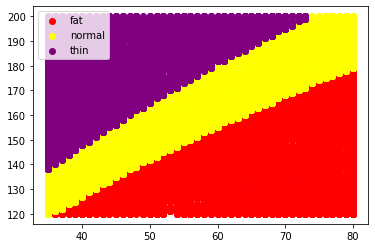

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl,color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label=lbl)
    
scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')

ax.legend()
plt.savefig('bmi-test.png')
plt.show()